<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPU and TPU
- Easy sharing

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [1]:
seconds_in_a_day = 24 * 60 * 60
print(seconds_in_a_day)

86400


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter." To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
print(seconds_in_a_week)

604800


In [0]:
import pandas as pd
import numpy as np
import os

We use tensorflow version 2, but in the colab the default version is 1.15; therefore, we should import the new version of tensorflow

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras

TensorFlow 2.x selected.


Now, we can checck the version of our tensorflow.

In [5]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


We can check that we are connected to a GPU or TPU

In [6]:
if 'COLAB_TPU_ADDR' in os.environ: 
    print('Connected to TPU') 
elif tf.test.gpu_device_name() is not '': 
    print('Connected to GPU ' + tf.test.gpu_device_name())
else:
    print('Neither connected to a TPU nor a GPU')

Neither connected to a TPU nor a GPU


What is the problem? How we can use hardware accelerator?
We should go to Runtime tab, and use "Change the runtime type." In there we can use TPU or GPU as our hardware acceleration.

# Load Data
In collab we can load data from our computer or from google drive
## Load Data from Computer
We can load data from our computer, so we can use these commands to upload our data in collab.

In [12]:
from google.colab import files 
uploaded = files.upload()

Saving adult.data to adult.data


Now, you can click on choose file button to upload your data into colab. Then, we can save it in a dataframe.

In [0]:
import io 
df2 = pd.read_csv(io.BytesIO(uploaded['adult.data']))

The problem arises when we have to work with huge Dataset, as google colab also provides many ways to upload your data to its Virtual Machine on which your code is running. But as soon as you got disconnected all of your Data is lost when you reconnect to new Virtual Machine that is offered to you. To avoid this problem, we upload our data from google drive.

## Load Data from Google Drive

### 1.   Upload your Data to your Google Drive.
### 2.   To mount your drive inside "gdrive" folder
### 3.   You’ll see a link, click on link, then allow access, copy the code that pops up, paste it at "Enter your authorization code:".



In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, we have access to our google drive, we can change the directory of our project.

In [23]:
import os

demo_folder = '/content/gdrive/My Drive/cmpsc448/colab_demo'

if not os.path.exists(demo_folder):
    os.makedirs(demo_folder)

os.chdir(demo_folder)

! pwd
! ls -la

/content/gdrive/My Drive/cmpsc448/colab_demo
total 0


### 4.   Let’s say you want to read "adult.test". You can read the file from that folder.

In [0]:
df = pd.read_csv('./adult.test');

### 5.If you want to copy the file to your google drive (In a folder) by executing this:

In [41]:
!ls -la
!cp '/content/adult.data' './'
!ls -la

total 1957
-rw------- 1 root root 2003153 Feb  8 19:58 adult.test
total 5838
-rw------- 1 root root 3974305 Feb  8 20:04 adult.data
-rw------- 1 root root 2003153 Feb  8 19:58 adult.test


## Run unix commands and install packges

In the google colab by putting "!" before your command you can run unix commands. Or, you can add '%%bash' in your cell which means that cell is a bash cell. 

In [43]:
!pwd
!ls -la
!pip install scipy
!apt install -y axel
!axel --version

/content/gdrive/My Drive/cmpsc448/colab_demo
total 5838
-rw------- 1 root root 3974305 Feb  8 20:04 adult.data
-rw------- 1 root root 2003153 Feb  8 19:58 adult.test
Reading package lists... Done
Building dependency tree       
Reading state information... Done
axel is already the newest version (2.16.1-1build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Axel version 2.16.1 (Linux)

Copyright 2001-2007 Wilmer van der Gaast,
	  2007-2009 Giridhar Appaji Nag,
	  2008-2010 Philipp Hagemeister,
	  2015-2017 Joao Eriberto Mota Filho,
	  2016-2017 Stephen Thirlwall,
	  2017      Ismael Luceno,
	  2017      Antonio Quartulli,
		    and others.
Please, see the CREDITS file.





In [44]:
%%bash
pwd
ls -la
pip install scipy
apt install -y axel
axel --version

/content/gdrive/My Drive/cmpsc448/colab_demo
total 5838
-rw------- 1 root root 3974305 Feb  8 20:04 adult.data
-rw------- 1 root root 2003153 Feb  8 19:58 adult.test
Reading package lists...
Building dependency tree...
Reading state information...
axel is already the newest version (2.16.1-1build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Axel version 2.16.1 (Linux)

Copyright 2001-2007 Wilmer van der Gaast,
	  2007-2009 Giridhar Appaji Nag,
	  2008-2010 Philipp Hagemeister,
	  2015-2017 Joao Eriberto Mota Filho,
	  2016-2017 Stephen Thirlwall,
	  2017      Ismael Luceno,
	  2017      Antonio Quartulli,
		    and others.
Please, see the CREDITS file.





## Keras
In this section, we will talk about keras, how to import it for tensorflow 2, and how to use it in different three different API style
- Sequential Model
- Functional API
- Model subclassing

Consider when you want to import keras, `tf.keras` can run any Keras-compatible code, but keep in mind the `tf.keras` version in the latest TensorFlow release might not be the same as the latest keras version from PyPI. Check `tf.keras.version`.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
# This is sequential API part
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential();
model.add(layers.Dense(20, activation='relu', input_shape=(10,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10, batch_size=32)

#This is functional API part
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(10,))
x = layers.Dense(20, activation='relu')(x)
x = layers.Dense(20, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x, y, epochs=10, batch_size=32)


#This is for model subclassing part
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class MyModel(keras.Model):
    def __init__:
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(20, activation='relu')
        self.dense2 = layers.Dense(20, activation='relu')
        self.dense3 = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

model = MyModel()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10, batch_size=32)

Let's see example on MNIST dataset

In [46]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.Sequential([
                                 layers.Flatten(input_shape=(28, 28)),
                                 layers.Dense(128, activation='relu'),
                                 layers.Dropout(0.2),
                                 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=1)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2908 - accuracy: 0.9153
Epoch 2/5
60000/60000 [==============================]

[0.07247910678032786, 0.9781]

### Distributed, multi-GPU, & TPU training
In this section we will talk about distributed and how to use them in our code.

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.utils import multi_gpu_model
import numpy as np

num_samples = 1000
height = 224
width = 224
num_classes = 1000

# Instantiate the base model
# It is better doing this with under a CPU device scope,
# so that the model's weights are hosted on CPU memory.
# Otherwise they may end up hosted on a GPU, which would
# complicate weight sharing.
with tf.device('/cpu:0'):
    model = Xception(weights=None,
                        input_shape=(height, width, 3),
                        classes=num_classes)

# Replicates the model on 8 GPUs.
# This assumes that your machine has 8 available GPUs.
parallel_model = multi_gpu_model(model, gpus=8)
parallel_model.compile(loss='categorical_crossentropy',
                       optimizer='rmsprop')

# Generate dummy data.
x = np.random.random((num_samples, height, width, 3))
y = np.random.random((num_samples, num_classes))

# This `fit` call will be distributed on 8 GPUs.
# Since the batch size is 256, each GPU will process 32 samples.
parallel_model.fit(x, y, epochs=20, batch_size=256)

# Save model via the template model (which shares the same weights):
model.save('my_model.h5')

Instructions for updating:
Use `tf.distribute.MirroredStrategy` instead.


ValueError: ignored

## CIFAR10 with Keras and CNN

Let's test Keras' CNN on CIFAR10.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [49]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

170500096/170498071 [==============================] - 2s 0us/step


### Model definition
Now we should define our model

In [0]:
model = Sequential()

model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(32, 32, 3)))

model.add(layers.MaxPool2D())

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation='relu'))

model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
__________________________________________________

In [52]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15,
                    verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 2.5609 - accuracy: 0.2735 - val_loss: 1.6508 - val_accuracy: 0.3899
Epoch 2/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.5599 - accuracy: 0.4405 - val_loss: 1.4897 - val_accuracy: 0.4785
Epoch 3/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.3496 - accuracy: 0.5247 - val_loss: 1.3200 - val_accuracy: 0.5310
Epoch 4/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.2606 - accuracy: 0.5593 - val_loss: 1.3645 - val_accuracy: 0.5410
Epoch 5/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1758 - accuracy: 0.5908 - val_loss: 1.2559 - val_accuracy: 0.5738
Epoch 6/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0993 - accuracy: 0.6204 - val_loss: 1.1843 - val_accuracy: 0.5885
Epoch 7/15
50000/50000 [==============================] 

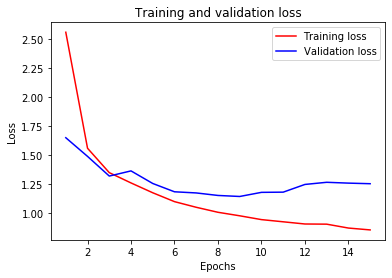

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Data Augmentation with Keras

Image data augmentation is a techneuiqe that can be used to expand size of the dataset by creating modified versions of images from the dataset.

Training deep neural network models on more data can result in a more skillful models. Since the augmentation techneuiqe will create different variations of the images; therefore, that can help the ability of the fit models to generalize what they have learned.

The Keras deep learning neural network library provides the capability to fit models using data augmentation when we are training deep neural network.

Image data augmentation is the most well known type of data augmentation which is based on rotation and transformation of the original image.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

